#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing Dataset

In [2]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=cols)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.isnull().sum() #the sum of missing values

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [6]:
df.describe() #the statistical measures

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.groupby('MEDV').mean() # for each uniqe median value –> mean value of other features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,,,,,,,,,,,,,
5.0,53.136300,0.0000,18.100000,0.000,0.693000,5.5680,100.000000,1.457500,24.000,666.0000,20.20000,390.935000,26.785000
5.6,25.046100,0.0000,18.100000,0.000,0.693000,5.9870,100.000000,1.588800,24.000,666.0000,20.20000,396.900000,26.770000
6.3,9.916550,0.0000,18.100000,0.000,0.693000,5.8520,77.800000,1.500400,24.000,666.0000,20.20000,338.160000,29.970000
7.0,22.964735,0.0000,22.920000,0.000,0.651000,4.9665,99.150000,1.706800,14.000,688.5000,20.15000,216.160000,30.475000
7.2,16.377533,0.0000,18.100000,0.000,0.690667,6.0180,99.366667,1.611633,24.000,666.0000,20.20000,273.683333,26.726667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46.7,0.298190,0.0000,6.200000,0.000,0.504000,7.6860,17.000000,3.375100,8.000,307.0000,17.40000,377.510000,3.920000
48.3,0.331470,0.0000,6.200000,0.000,0.507000,8.2470,70.400000,3.651900,8.000,307.0000,17.40000,378.950000,3.950000
48.5,0.035100,95.0000,2.680000,0.000,0.416100,7.8530,33.200000,5.118000,4.000,224.0000,14.70000,392.780000,3.810000


<Axes: >

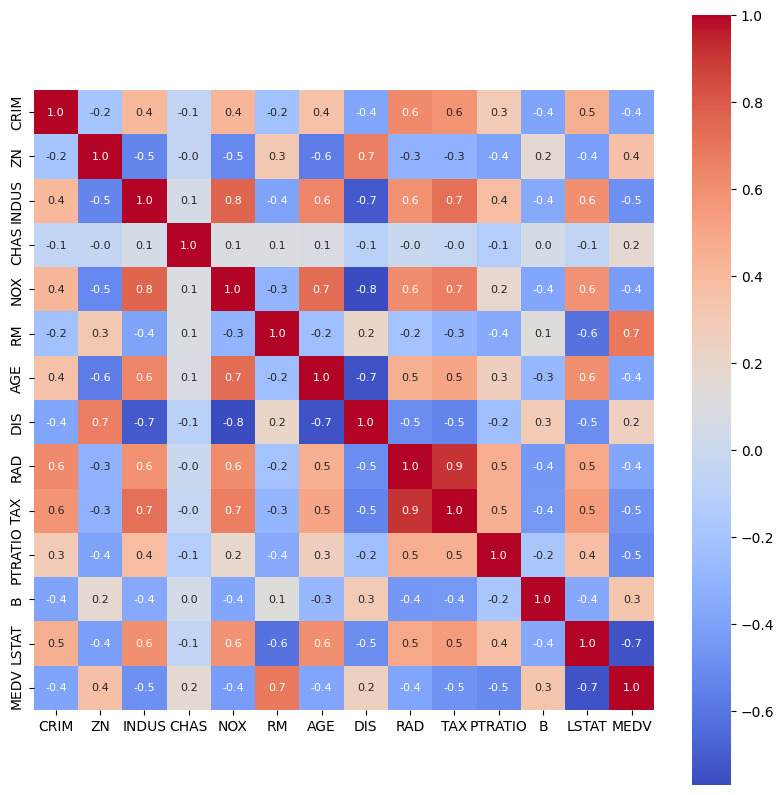

In [8]:
#Let's now cunstruct the heat map to understand the correlation between the features(how they depend on each other)
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')

#Splitting the Dataset into the Training and Test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

#Training on XGboost Regressor

In [10]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Now let's evaluate our model (R squared error) and (mean absolute error)

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
y_pred = regressor.predict(X_test)
print("R squared error:", r2_score(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

R squared error: 0.9051721149855378
Mean absolute error: 2.0748727686264927


#Now let's plot what we've got here!

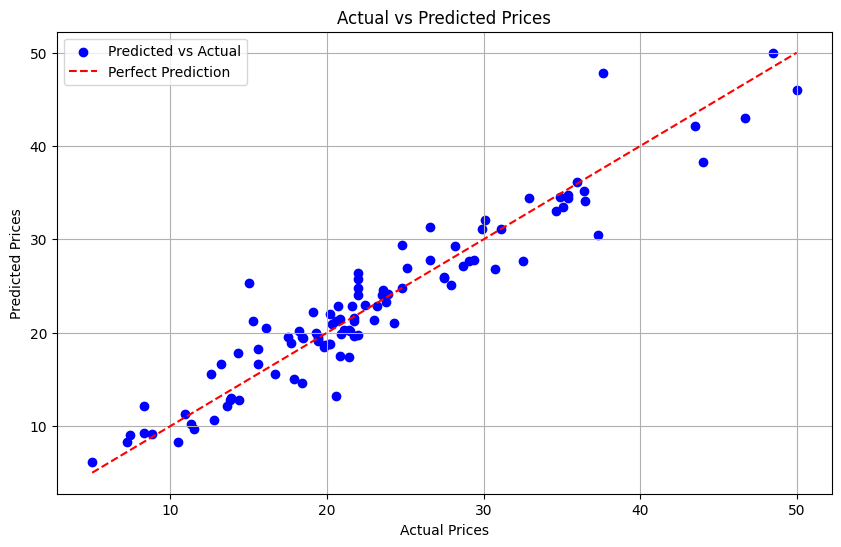

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()